In [37]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import warnings
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import gym
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
df=pd.read_csv("/kaggle/input/datasupplychain/DataCoSupplyChainDataset.csv",encoding='latin1')

In [39]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [40]:
df.shape

(180519, 53)

In [41]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [42]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [43]:
relevant_columns = [
    'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order',
    'Order Item Total', 'Late_delivery_risk', 'Order Item Quantity', 'Product Price',
    'Latitude', 'Longitude', 'Customer City', 'Order City', 'Market', 'Order Region',
    'Shipping Mode', 'order date (DateOrders)', 'shipping date (DateOrders)'
]
df = df[relevant_columns]

df.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Order Item Total,Late_delivery_risk,Order Item Quantity,Product Price,Latitude,Longitude,Customer City,Order City,Market,Order Region,Shipping Mode,order date (DateOrders),shipping date (DateOrders)
0,3,4,91.250000,314.640015,0,1,327.75,18.251453,-66.037056,Caguas,Bekasi,Pacific Asia,Southeast Asia,Standard Class,1/31/2018 22:56,2/3/2018 22:56
1,5,4,-249.089996,311.359985,1,1,327.75,18.279451,-66.037064,Caguas,Bikaner,Pacific Asia,South Asia,Standard Class,1/13/2018 12:27,1/18/2018 12:27
2,4,4,-247.779999,309.720001,0,1,327.75,37.292233,-121.881279,San Jose,Bikaner,Pacific Asia,South Asia,Standard Class,1/13/2018 12:06,1/17/2018 12:06
3,3,4,22.860001,304.809998,0,1,327.75,34.125946,-118.291016,Los Angeles,Townsville,Pacific Asia,Oceania,Standard Class,1/13/2018 11:45,1/16/2018 11:45
4,2,4,134.210007,298.250000,0,1,327.75,18.253769,-66.037048,Caguas,Townsville,Pacific Asia,Oceania,Standard Class,1/13/2018 11:24,1/15/2018 11:24


In [44]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['Shipping_Delay'] = (df['shipping date (DateOrders)'] - df['order date (DateOrders)']).dt.total_seconds() / (24 * 3600)

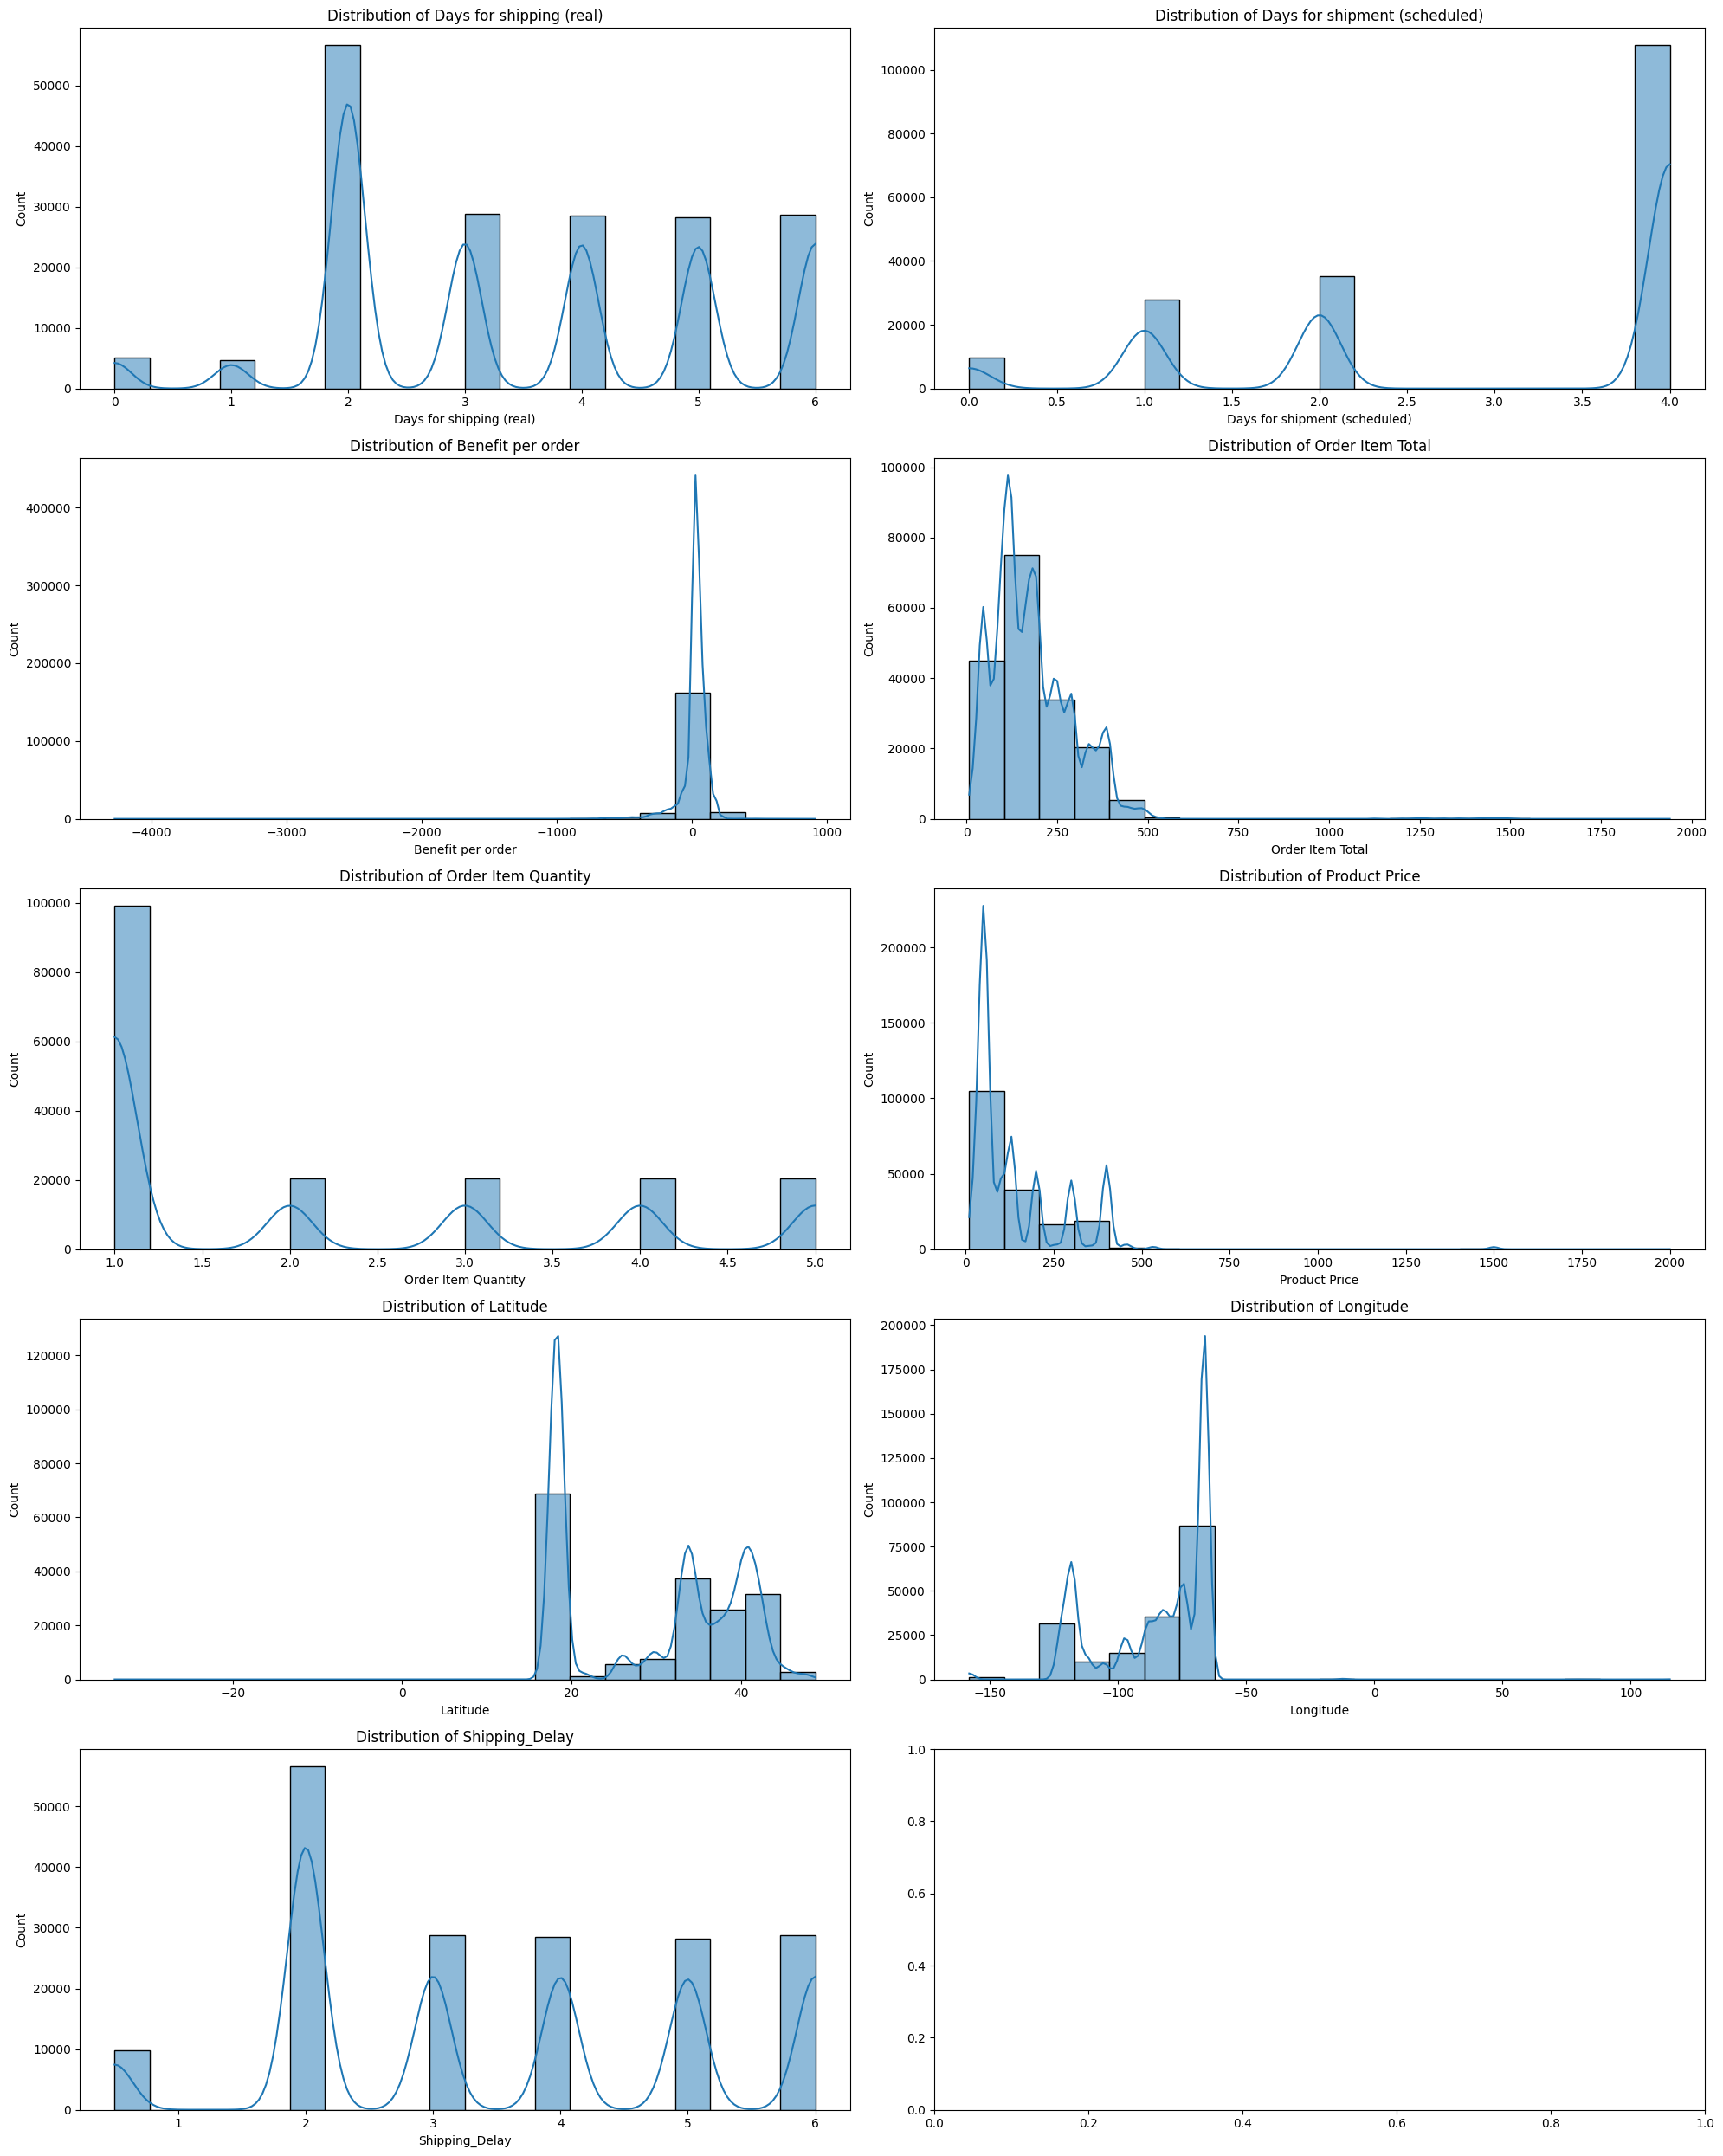

In [45]:
numerical_columns = [
    'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order',
    'Order Item Total', 'Order Item Quantity', 'Product Price', 'Latitude', 'Longitude',
    'Shipping_Delay'
]
categorical_columns = ['Customer City', 'Order City', 'Market', 'Order Region', 'Shipping Mode', 'Late_delivery_risk']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
fig.tight_layout()
plt.show()

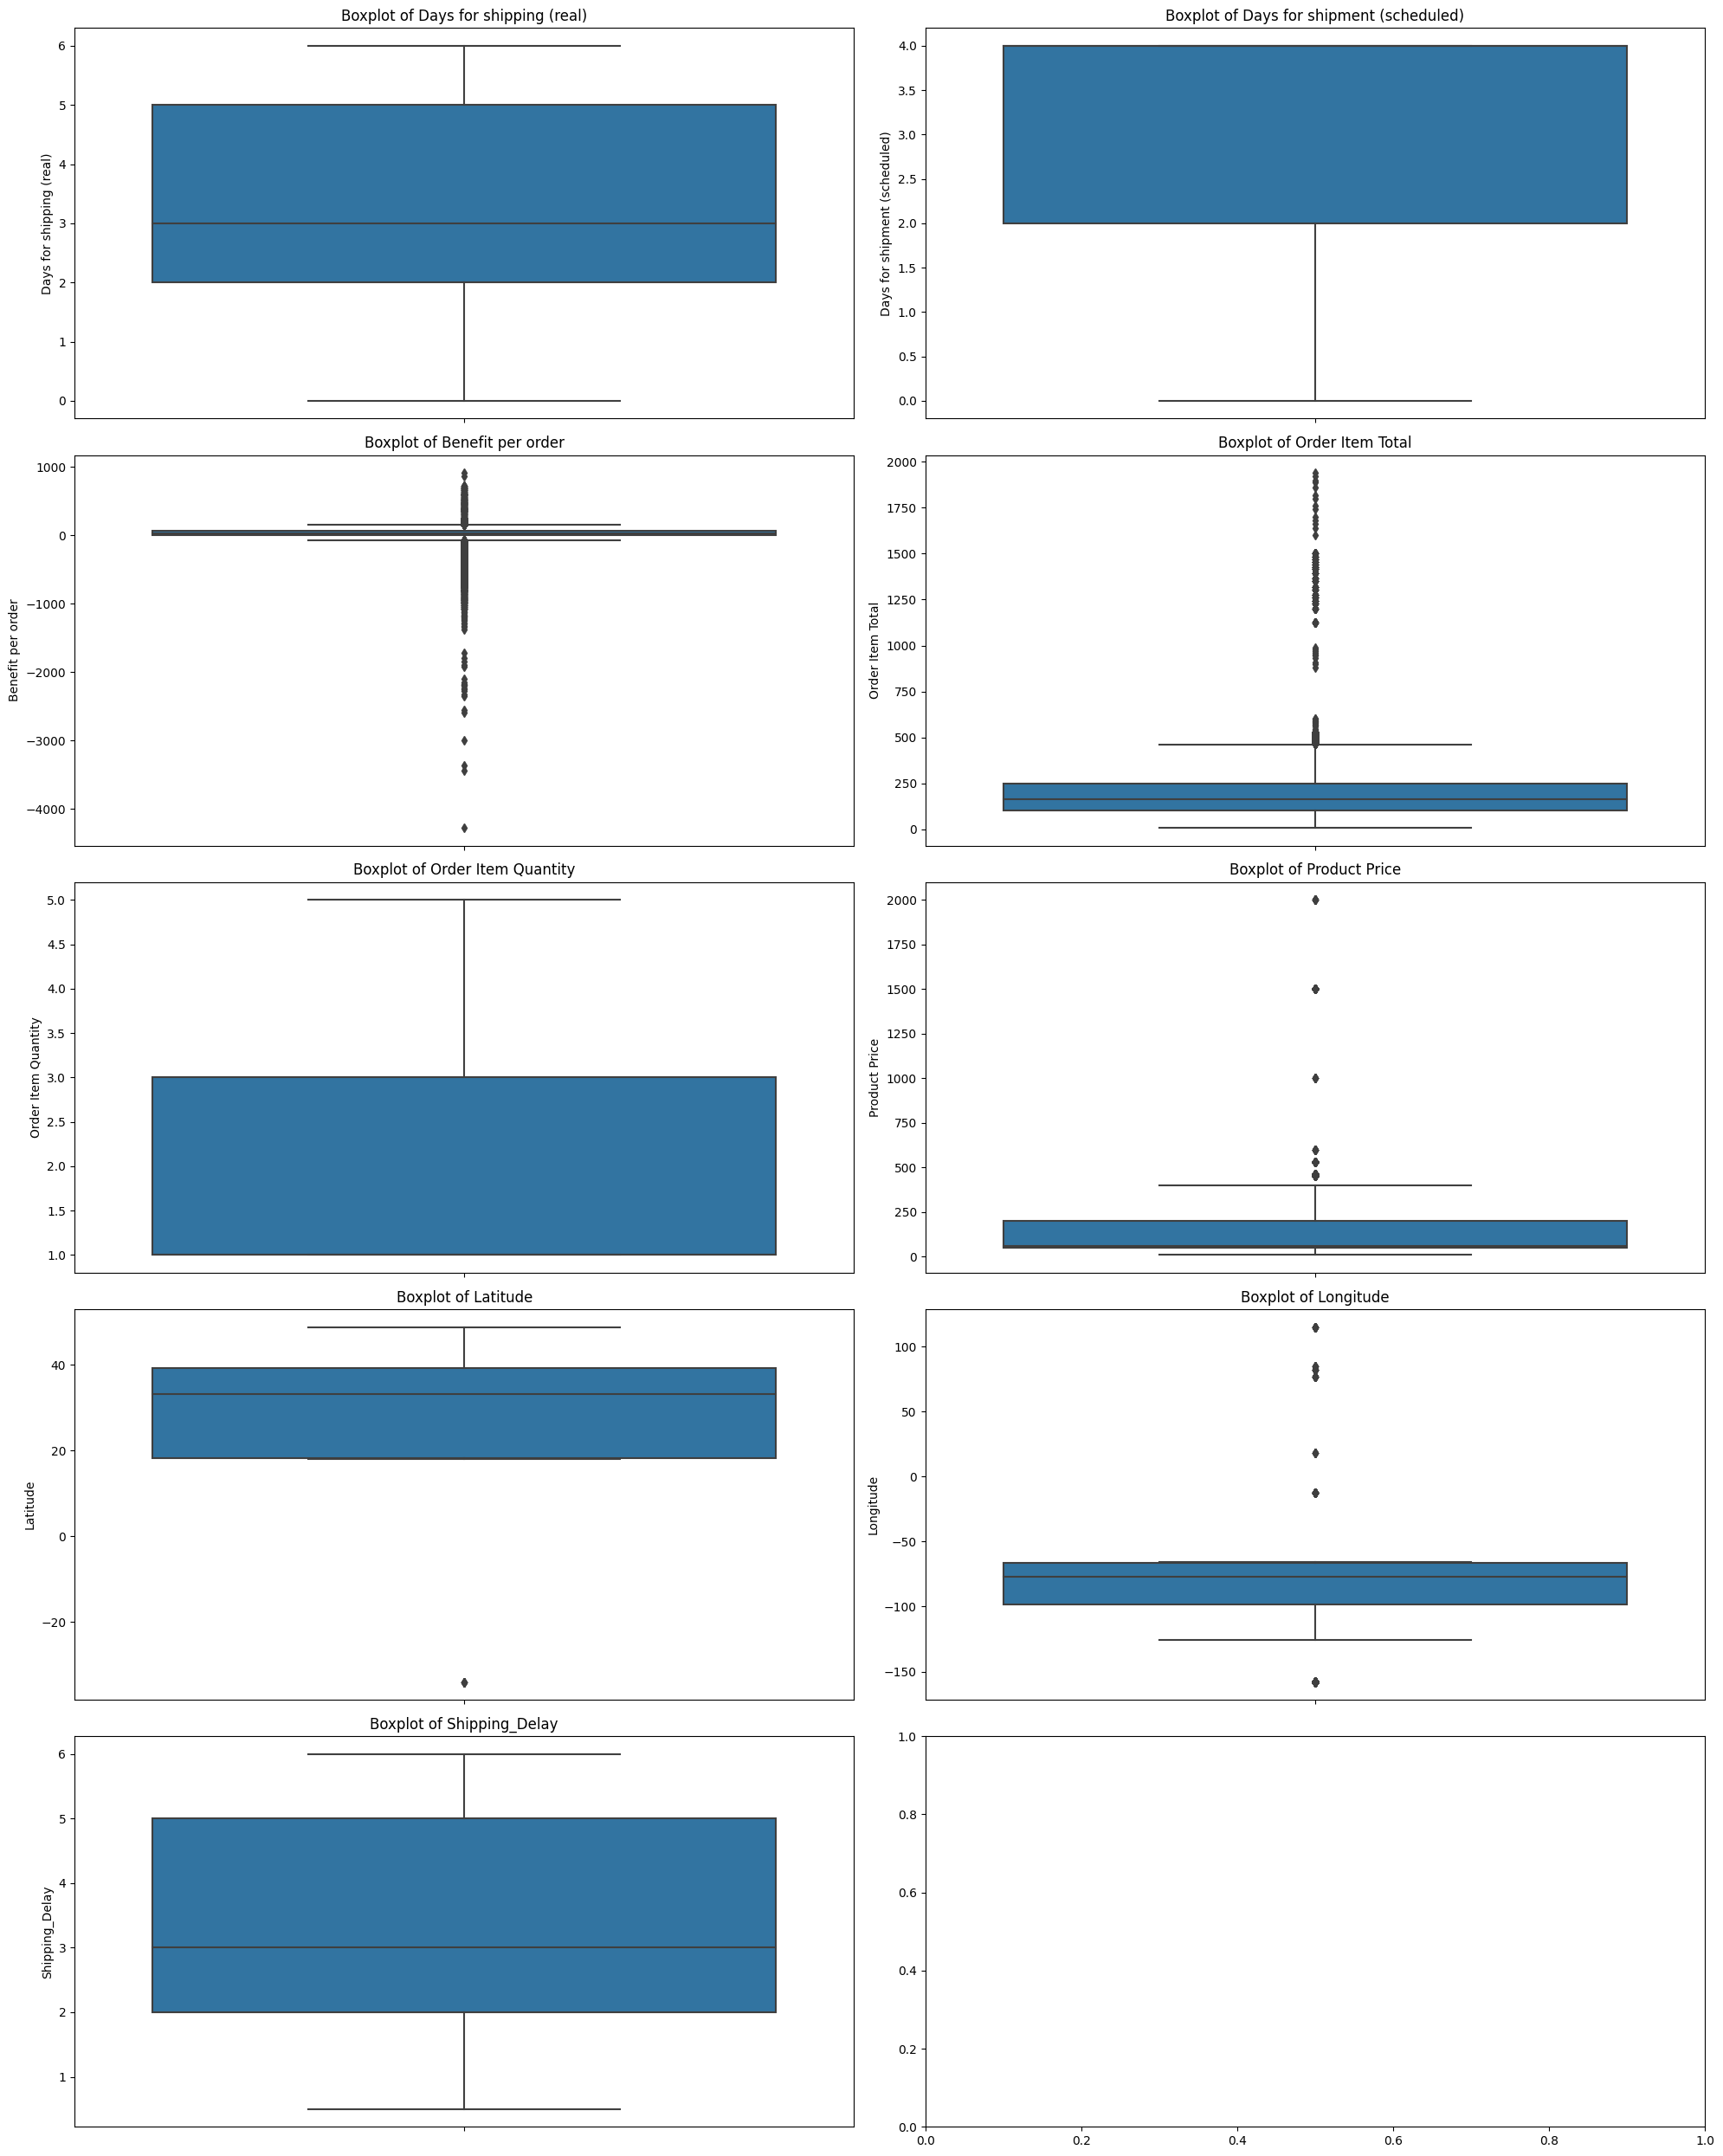

In [46]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
fig.tight_layout()
plt.show()

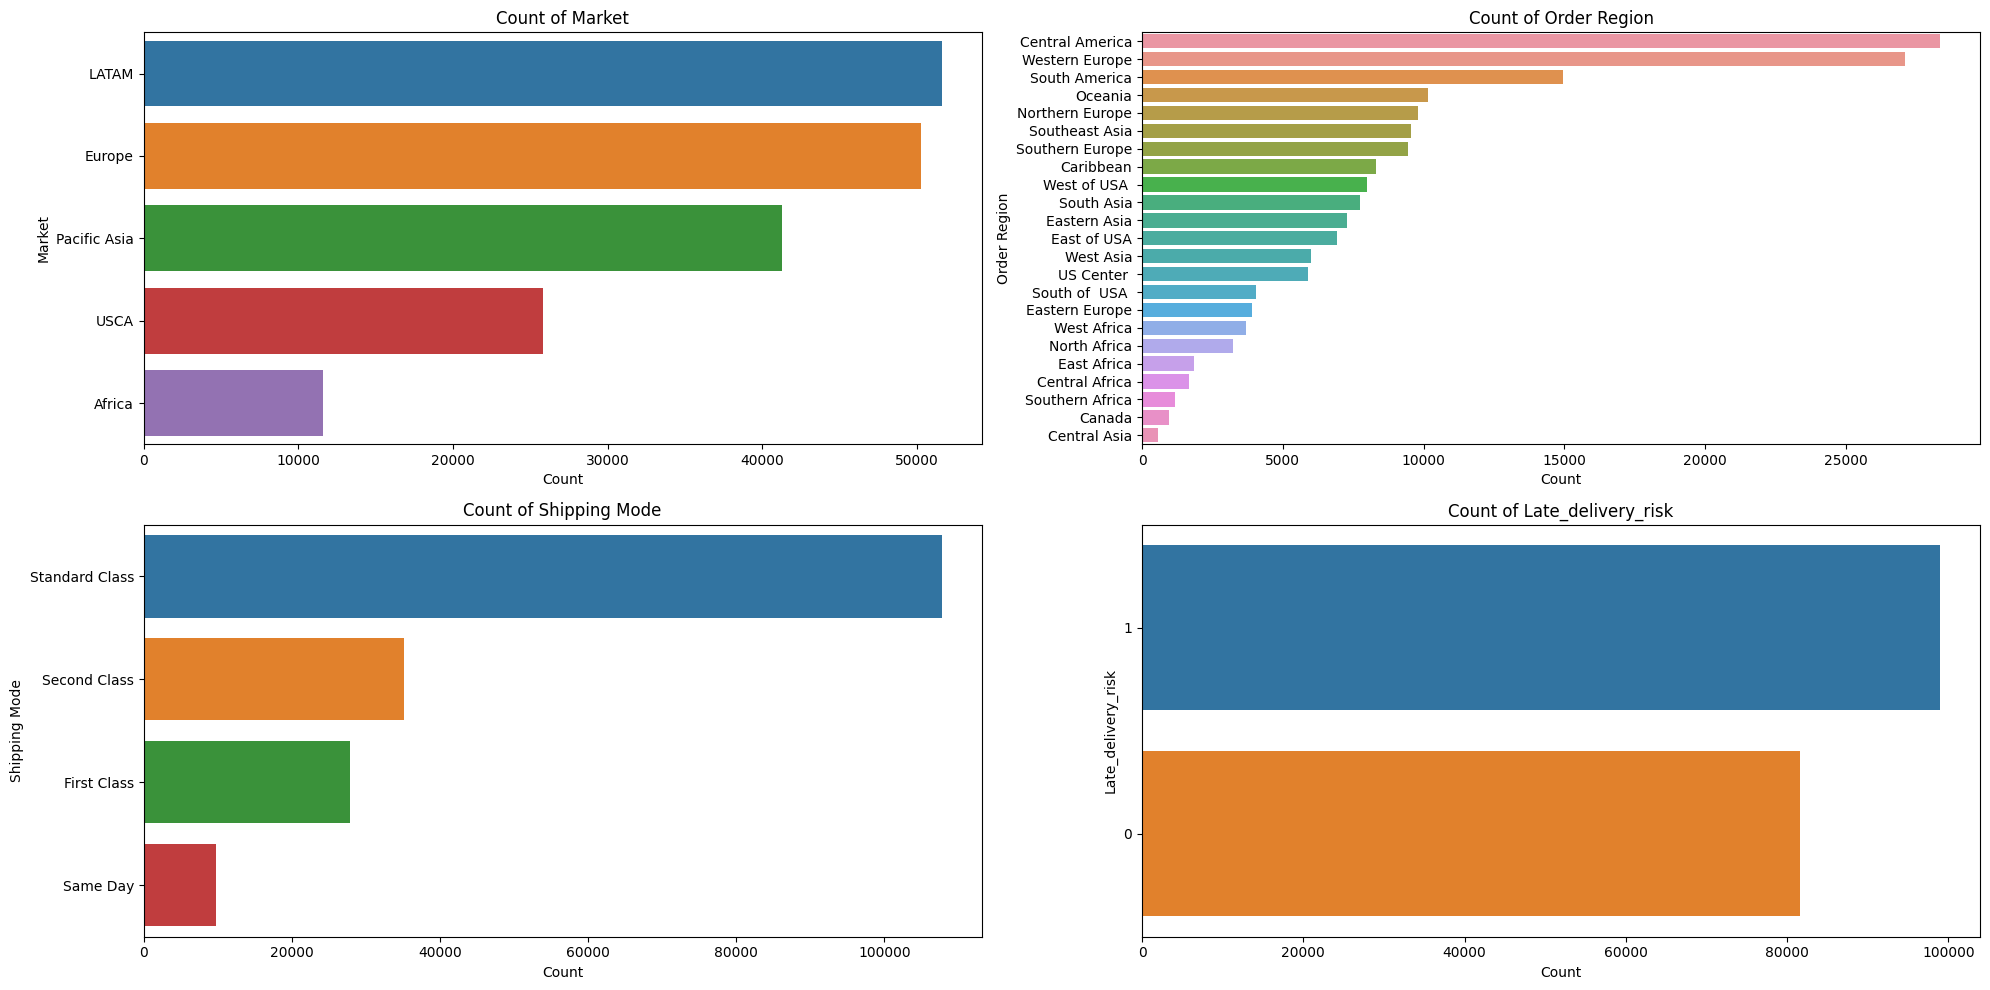

In [47]:
# Define updated categorical columns, excluding Customer City and Order City
categorical_columns = ['Market', 'Order Region', 'Shipping Mode', 'Late_delivery_risk']

# Create subplots for categorical features (2x2 grid for 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
fig.tight_layout()
plt.show()

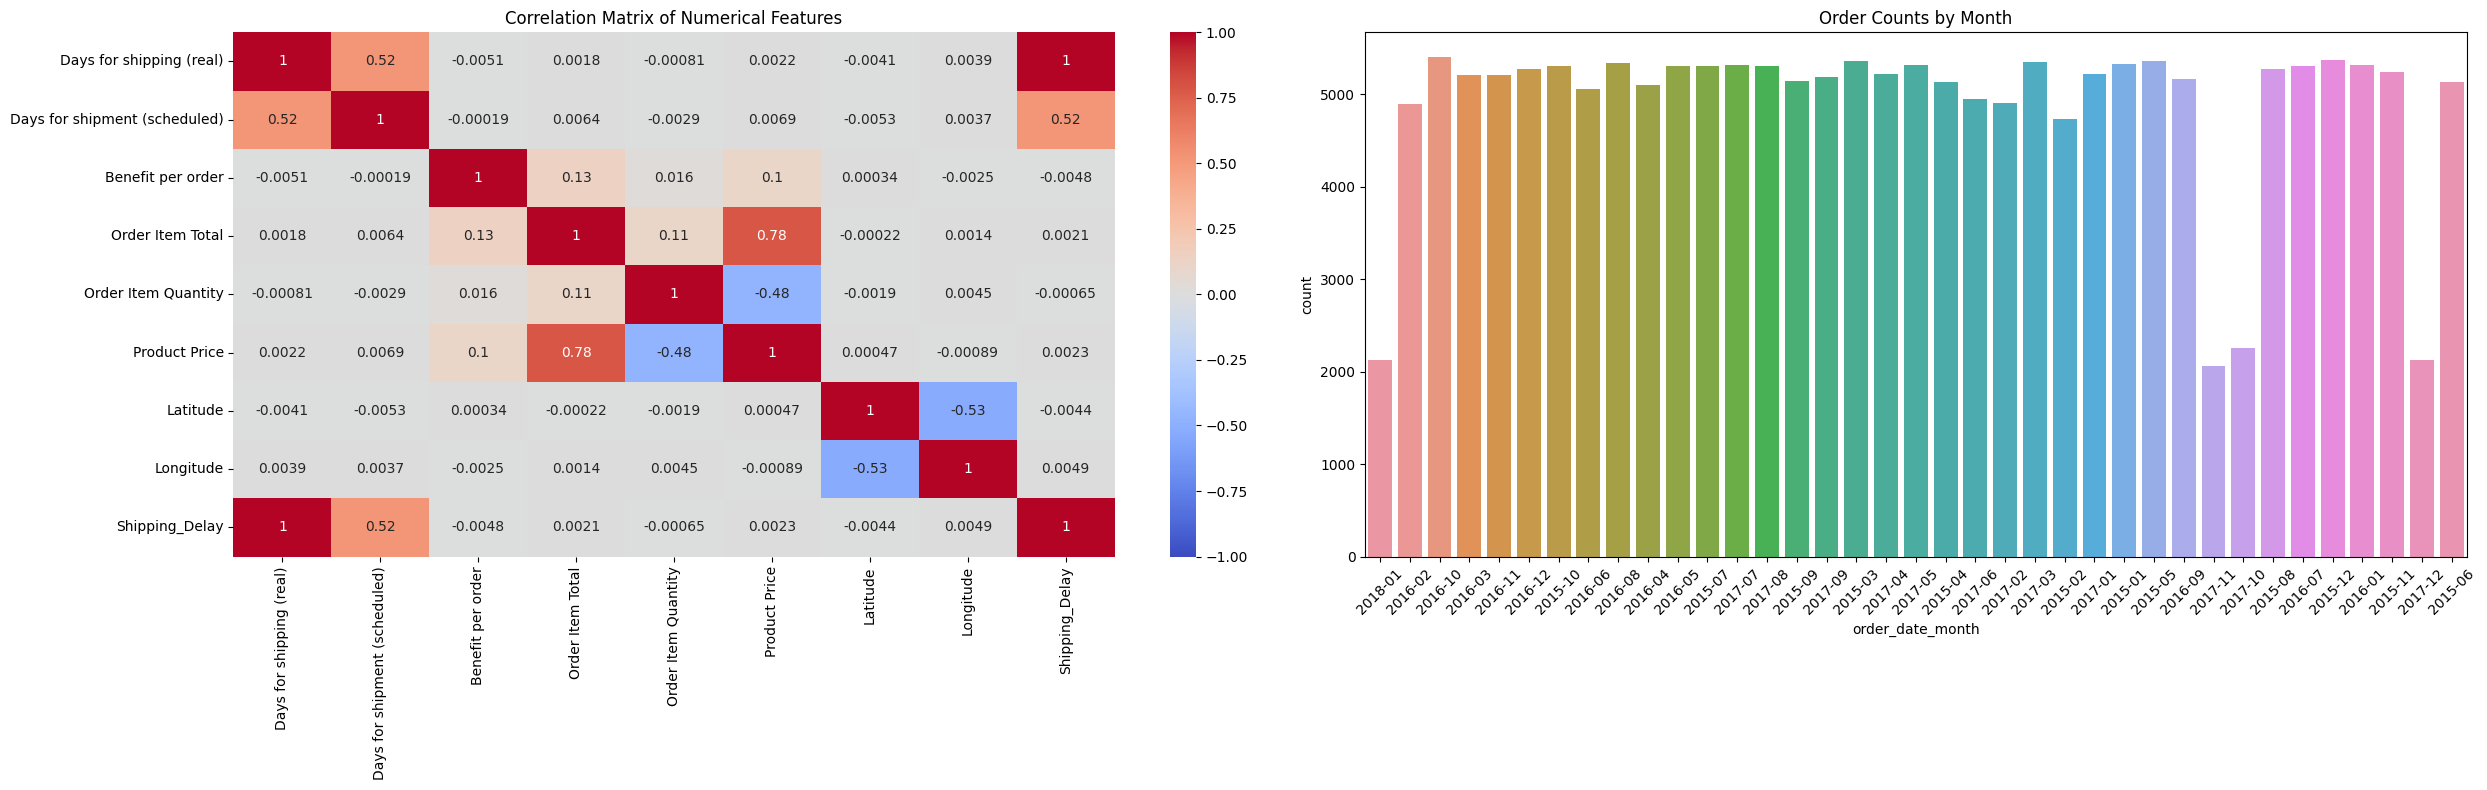

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))
# Correlation Heatmap
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlation Matrix of Numerical Features')
# Temporal Trends
df['order_date_month'] = df['order date (DateOrders)'].dt.to_period('M')
sns.countplot(x='order_date_month', data=df, ax=axes[1])
axes[1].set_title('Order Counts by Month')
axes[1].tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

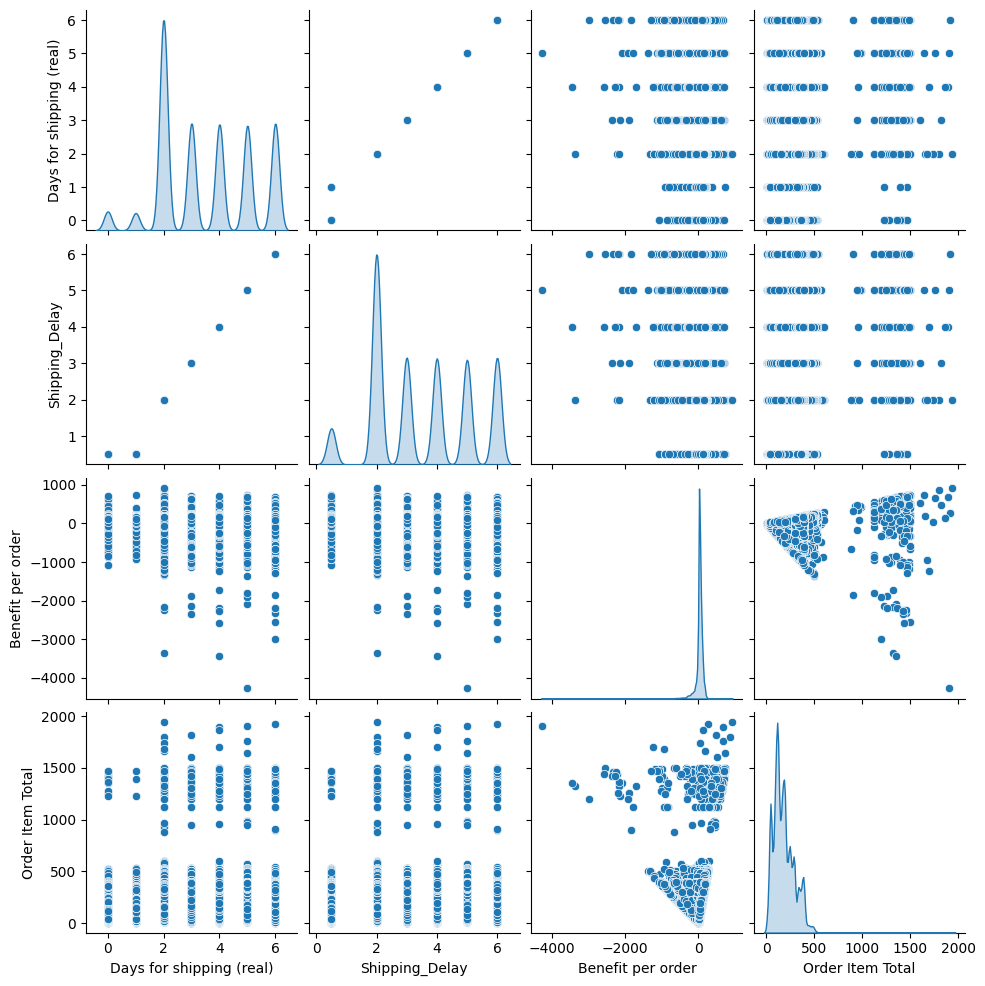

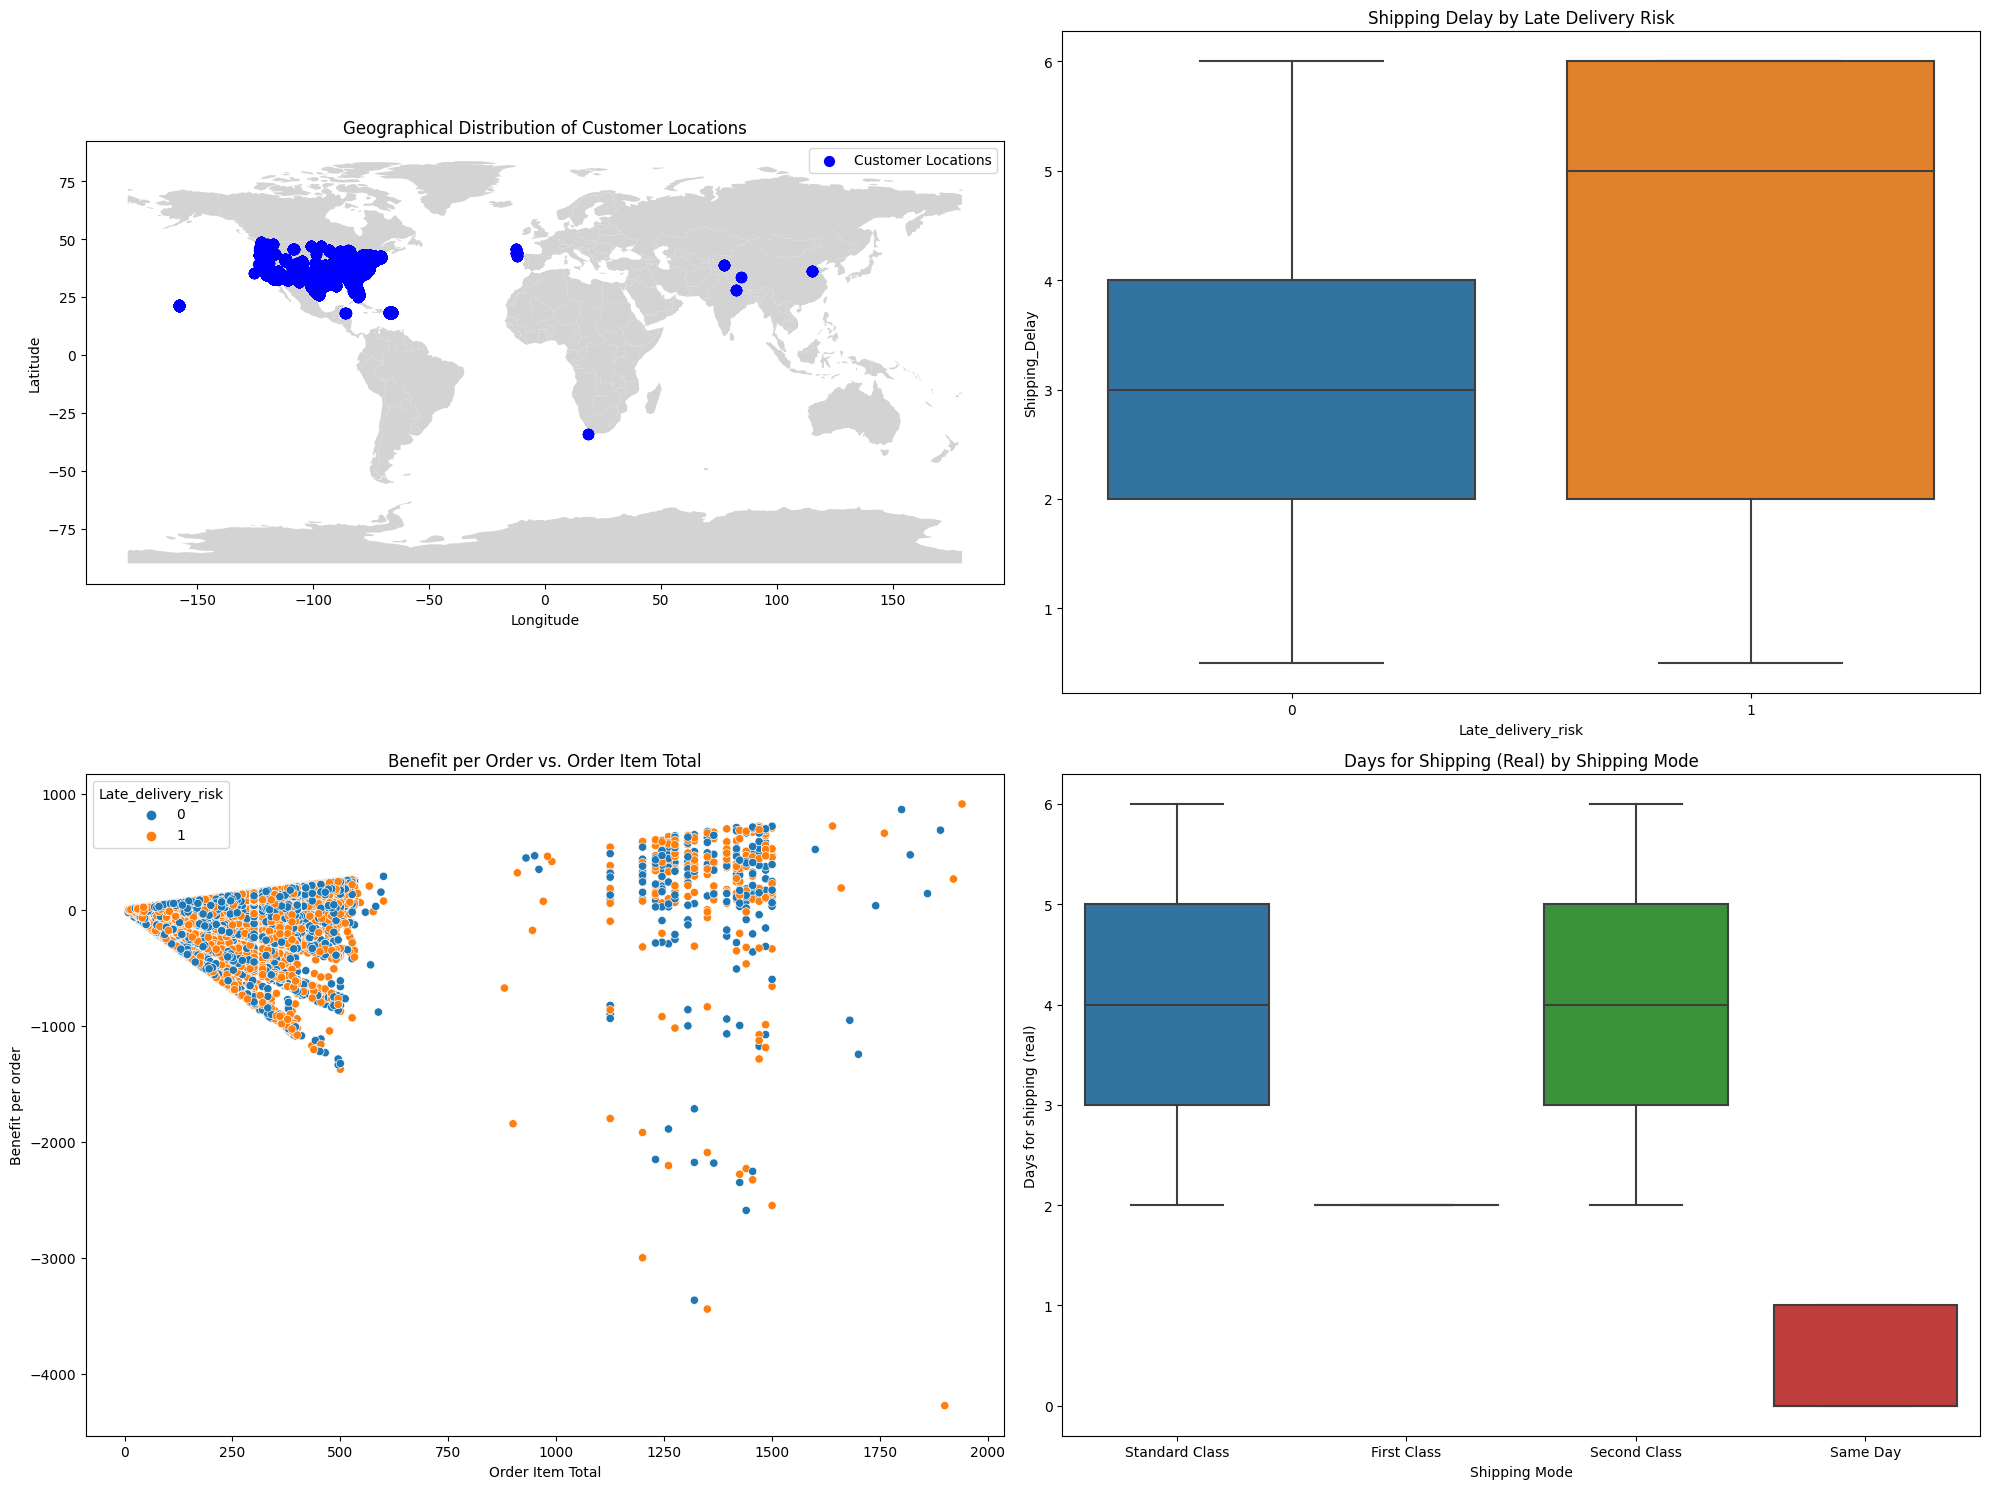

In [49]:
key_numerical = ['Days for shipping (real)', 'Shipping_Delay', 'Benefit per order', 'Order Item Total']
sns.pairplot(df[key_numerical], diag_kind='kde')
plt.show()

# 6. Subplot for Geographical and Relationship Plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flatten()

# Geographical Plot
gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df['Longitude'], df['Latitude'])])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=axes[0], color='lightgrey')
gdf.plot(ax=axes[0], color='blue', markersize=50, label='Customer Locations')
axes[0].set_title('Geographical Distribution of Customer Locations')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].legend()

# Shipping Delay vs. Late Delivery Risk
sns.boxplot(x='Late_delivery_risk', y='Shipping_Delay', data=df, ax=axes[1])
axes[1].set_title('Shipping Delay by Late Delivery Risk')

# Benefit per Order vs. Order Item Total
sns.scatterplot(x='Order Item Total', y='Benefit per order', hue='Late_delivery_risk', data=df, ax=axes[2])
axes[2].set_title('Benefit per Order vs. Order Item Total')

# Delivery Performance by Shipping Mode
sns.boxplot(x='Shipping Mode', y='Days for shipping (real)', data=df, ax=axes[3])
axes[3].set_title('Days for Shipping (Real) by Shipping Mode')

fig.tight_layout()
plt.show()

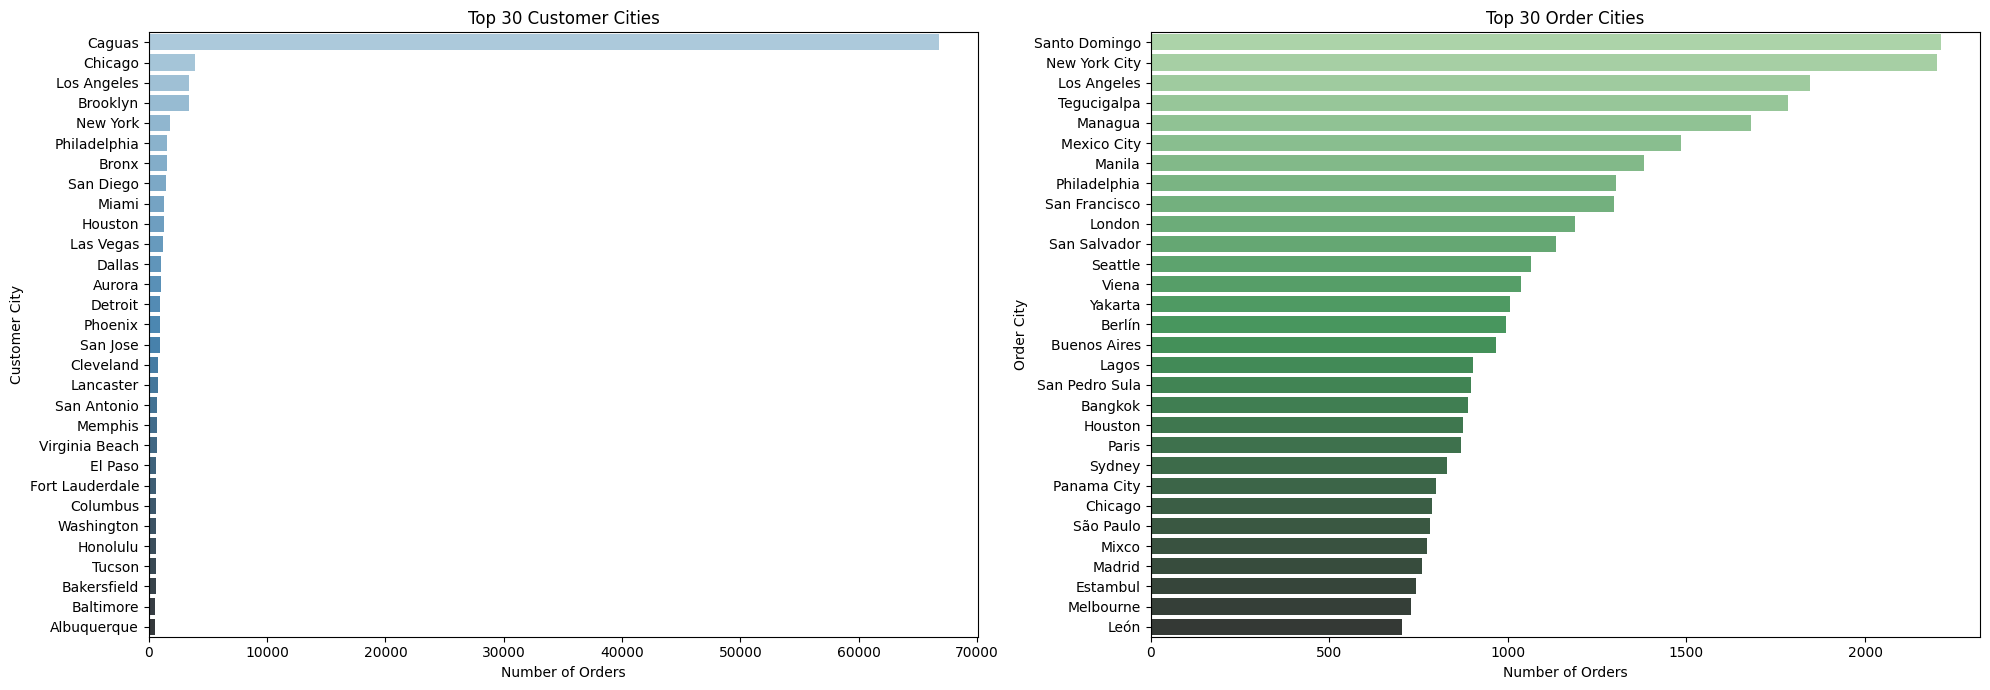

In [50]:
# Count top 30 cities
top_customer_cities = df['Customer City'].value_counts().nlargest(30)
top_order_cities = df['Order City'].value_counts().nlargest(30)

# Create subplots
plt.figure(figsize=(20, 7))

# Customer City subplot
plt.subplot(1, 2, 1)
sns.barplot(y=top_customer_cities.index, x=top_customer_cities.values, palette="Blues_d")
plt.title("Top 30 Customer Cities")
plt.xlabel("Number of Orders")
plt.ylabel("Customer City")

# Order City subplot
plt.subplot(1, 2, 2)
sns.barplot(y=top_order_cities.index, x=top_order_cities.values, palette="Greens_d")
plt.title("Top 30 Order Cities")
plt.xlabel("Number of Orders")
plt.ylabel("Order City")

plt.tight_layout()
plt.show()

In [51]:
# Extract month for seasonality
df['order_date_month'] = df['order date (DateOrders)'].dt.to_period('M')

In [52]:
from sklearn.preprocessing import MinMaxScaler
import pickle
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from stable_baselines3.common.vec_env import DummyVecEnv
from collections import Counter

In [53]:
# Initialize dictionary for storing mappings
mappings = {}

# Define and encode all categorical columns with mapping
categorical_columns = ['Shipping Mode', 'Market', 'Order Region', 'Customer City', 'Order City']
for col in categorical_columns:
    cat_series = df[col].astype('category')
    df[f'{col}_Encoded'] = cat_series.cat.codes
    mappings[col] = dict(enumerate(cat_series.cat.categories))

# Save both encoded DataFrame and mappings to pickle
with open('encoded_df_and_mappings.pkl', 'wb') as f:
    pickle.dump({'data': df, 'mappings': mappings}, f)

print("✅ Encoded DataFrame and mappings saved to 'encoded_df_and_mappings.pkl'")

✅ Encoded DataFrame and mappings saved to 'encoded_df_and_mappings.pkl'


In [54]:
numerical_cols = ['Benefit per order', 'Order Item Total', 'Product Price', 'Latitude']
minmax_scaler = MinMaxScaler()
df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])
with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(minmax_scaler, f)

In [55]:
# Print the mappings for each categorical column
for col, mapping in mappings.items():
    print(f"\n📌 Mapping for '{col}':")
    for code, category in mapping.items():
        print(f"  {code} → {category}")



📌 Mapping for 'Shipping Mode':
  0 → First Class
  1 → Same Day
  2 → Second Class
  3 → Standard Class

📌 Mapping for 'Market':
  0 → Africa
  1 → Europe
  2 → LATAM
  3 → Pacific Asia
  4 → USCA

📌 Mapping for 'Order Region':
  0 → Canada
  1 → Caribbean
  2 → Central Africa
  3 → Central America
  4 → Central Asia
  5 → East Africa
  6 → East of USA
  7 → Eastern Asia
  8 → Eastern Europe
  9 → North Africa
  10 → Northern Europe
  11 → Oceania
  12 → South America
  13 → South Asia
  14 → South of  USA 
  15 → Southeast Asia
  16 → Southern Africa
  17 → Southern Europe
  18 → US Center 
  19 → West Africa
  20 → West Asia
  21 → West of USA 
  22 → Western Europe

📌 Mapping for 'Customer City':
  0 → Aguadilla
  1 → Alameda
  2 → Albany
  3 → Albuquerque
  4 → Algonquin
  5 → Alhambra
  6 → Allentown
  7 → Alpharetta
  8 → Amarillo
  9 → Anaheim
  10 → Ann Arbor
  11 → Annandale
  12 → Annapolis
  13 → Antioch
  14 → Apex
  15 → Apopka
  16 → Arecibo
  17 → Arlington
  18 → Arlin

In [56]:
unnecessary_cols = ['order date (DateOrders)', 'shipping date (DateOrders)', 'order_date_month', 'Order Item Quantity',"Customer City",
                   "Order City","Market","Order Region","Shipping Mode"]
df = df.drop(columns=[col for col in unnecessary_cols if col in df.columns])

In [57]:
df.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Order Item Total,Late_delivery_risk,Product Price,Latitude,Longitude,Shipping_Delay,Shipping Mode_Encoded,Market_Encoded,Order Region_Encoded,Customer City_Encoded,Order City_Encoded
0,3,4,0.841800,0.158939,0,0.159678,0.630916,-66.037056,3.0,3,3,15,66,331
1,5,4,0.776183,0.157242,1,0.159678,0.631254,-66.037064,5.0,3,3,13,66,391
2,4,4,0.776435,0.156393,0,0.159678,0.861100,-121.881279,4.0,3,3,13,452,391
3,3,4,0.828614,0.153853,0,0.159678,0.822823,-118.291016,3.0,3,3,11,285,3226
4,2,4,0.850082,0.150458,0,0.159678,0.630944,-66.037048,2.0,3,3,11,66,3226


# Verify required columns

In [58]:
state_cols = [
    'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order',
    'Order Item Total', 'Product Price', 'Latitude', 'Longitude', 'Shipping_Delay',
    'Late_delivery_risk', 'Shipping Mode_Encoded', 'Market_Encoded',
    'Order Region_Encoded', 'Customer City_Encoded', 'Order City_Encoded'
]
reward_cols = ['Shipping_Delay', 'Late_delivery_risk', 'Benefit per order']

In [59]:
df.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Order Item Total,Late_delivery_risk,Product Price,Latitude,Longitude,Shipping_Delay,Shipping Mode_Encoded,Market_Encoded,Order Region_Encoded,Customer City_Encoded,Order City_Encoded
0,3,4,0.841800,0.158939,0,0.159678,0.630916,-66.037056,3.0,3,3,15,66,331
1,5,4,0.776183,0.157242,1,0.159678,0.631254,-66.037064,5.0,3,3,13,66,391
2,4,4,0.776435,0.156393,0,0.159678,0.861100,-121.881279,4.0,3,3,13,452,391
3,3,4,0.828614,0.153853,0,0.159678,0.822823,-118.291016,3.0,3,3,11,285,3226
4,2,4,0.850082,0.150458,0,0.159678,0.630944,-66.037048,2.0,3,3,11,66,3226


#  Define custom Gym environment

In [60]:
class SupplyChainEnv(gym.Env):
    def __init__(self, df, mappings, state_cols):
        super(SupplyChainEnv, self).__init__()
        self.column_indices = {col: df.columns.get_loc(col) for col in df.columns}
        self.df = df.to_numpy()
        self.mappings = mappings
        self.current_step = 0
        self.episode_step = 0  # Track steps within an episode
        self.max_steps = 100  # Fixed to 100 steps per episode
        self.state_cols = state_cols
        self.state_indices = [df.columns.get_loc(col) for col in state_cols]
        self.state_size = len(self.state_cols)
        self.observation_space = spaces.Box(low=0, high=1, shape=(self.state_size,), dtype=np.float32)
        self.action_space = spaces.Discrete(4)
        self.action_history = []
        self.row_indices = []
        # Print dataset statistics
        print("Dataset size:", len(df))
        print("State columns:", state_cols)
        print("Shipping Delay stats: min=", np.min(self.df[:, self.column_indices['Shipping_Delay']]), 
              ", max=", np.max(self.df[:, self.column_indices['Shipping_Delay']]), 
              ", mean=", np.mean(self.df[:, self.column_indices['Shipping_Delay']]))
        print("Late Delivery Risk stats: min=", np.min(self.df[:, self.column_indices['Late_delivery_risk']]), 
              ", max=", np.max(self.df[:, self.column_indices['Late_delivery_risk']]), 
              ", mean=", np.mean(self.df[:, self.column_indices['Late_delivery_risk']]))
        print("Benefit per Order stats: min=", np.min(self.df[:, self.column_indices['Benefit per order']]), 
              ", max=", np.max(self.df[:, self.column_indices['Benefit per order']]), 
              ", mean=", np.mean(self.df[:, self.column_indices['Benefit per order']]))

    def reset(self):
        self.current_step = np.random.randint(0, max(1, len(self.df) - self.max_steps))
        self.episode_step = 0
        self.action_history = []
        self.row_indices = []
        state = self.df[self.current_step, self.state_indices].astype(np.float32)
        state = np.clip(state, 0, 1)
        self.row_indices.append(self.current_step)
        return state
    
    def step(self, action):
        row = self.df[self.current_step].copy()
        shipping_delay = row[self.column_indices['Shipping_Delay']]
        late_risk = row[self.column_indices['Late_delivery_risk']]
        benefit = row[self.column_indices['Benefit per order']]
        shipping_mode_encoded = action / (len(self.mappings['Shipping Mode']) - 1)
        row[self.column_indices['Shipping Mode_Encoded']] = shipping_mode_encoded
        delay_factor = [1.0, 0.95, 0.90, 0.85][action]
        risk_factor = [1.0, 0.95, 0.90, 0.85][action]
        shipping_delay = np.clip(shipping_delay * delay_factor, 0.0, 1.0)
        late_risk = np.clip(late_risk * risk_factor, 0.0, 1.0)
        # Optimized reward function
        reward = -0.1 * shipping_delay - 0.2 * late_risk + 2.0 * benefit
        action_penalty = [0.0, -0.02, -0.04, -0.06][action]  # Increased penalties
        reward += action_penalty
        if shipping_delay < 0.4:  # Lowered threshold for bonus
            reward += 0.75
        if late_risk < 0.4:
            reward += 0.75
        self.action_history.append(action)
        self.current_step += 1
        self.episode_step += 1
        # Fixed done condition: terminate after 100 steps or dataset end
        done = self.episode_step >= self.max_steps or self.current_step >= len(self.df) - 1
        if not done:
            state = self.df[self.current_step, self.state_indices].astype(np.float32)
            state = np.clip(state, 0, 1)
            self.row_indices.append(self.current_step)
        else:
            state = row[self.state_indices].astype(np.float32)
            state = np.clip(state, 0, 1)
            self.row_indices.append(self.current_step - 1)
        info = {'shipping_delay': shipping_delay, 'late_risk': late_risk, 'benefit': benefit}
        return state, reward, done, info

class TrainingVisualizationCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(TrainingVisualizationCallback, self).__init__(verbose)
        self.rewards = []
        self.avg_rewards = []

    def _on_step(self):
        reward = self.locals['rewards'][0]
        self.rewards.append(reward)
        avg_reward = np.mean(self.rewards[-100:]) if len(self.rewards) >= 100 else np.mean(self.rewards)
        self.avg_rewards.append(avg_reward)
        if self.num_timesteps % 20000 == 0:
            print(f"Timesteps: {self.num_timesteps}, Avg Reward: {avg_reward:.3f}")
        return True

# Create training environment with 2 parallel environments

In [61]:
env = make_vec_env(lambda: SupplyChainEnv(df, mappings, state_cols), n_envs=2)

# Create separate evaluation environment
eval_env = make_vec_env(lambda: SupplyChainEnv(df, mappings, state_cols), n_envs=1)

# Initialize PPO model
model = PPO('MlpPolicy',env,verbose=2,learning_rate=2e-4,n_steps=2048,batch_size=128,n_epochs=10,gamma=0.99,gae_lambda=0.95,clip_range=0.2,
    ent_coef=0.25,
    policy_kwargs=dict(net_arch=[256, 256]))

# Train with callbacks
print("Starting training...")
callback = TrainingVisualizationCallback()
model.learn(total_timesteps=1000000,callback=[callback,EvalCallback(eval_env,eval_freq=20000,n_eval_episodes=20,deterministic=True,verbose=1)])
print("Training complete.")

Dataset size: 180519
State columns: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Order Item Total', 'Product Price', 'Latitude', 'Longitude', 'Shipping_Delay', 'Late_delivery_risk', 'Shipping Mode_Encoded', 'Market_Encoded', 'Order Region_Encoded', 'Customer City_Encoded', 'Order City_Encoded']
Shipping Delay stats: min= 0.5 , max= 6.0 , mean= 3.498825608384713
Late Delivery Risk stats: min= 0.0 , max= 1.0 , mean= 0.5482913155955883
Benefit per Order stats: min= 0.0 , max= 1.0 , mean= 0.8284436577827631
Dataset size: 180519
State columns: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Order Item Total', 'Product Price', 'Latitude', 'Longitude', 'Shipping_Delay', 'Late_delivery_risk', 'Shipping Mode_Encoded', 'Market_Encoded', 'Order Region_Encoded', 'Customer City_Encoded', 'Order City_Encoded']
Shipping Delay stats: min= 0.5 , max= 6.0 , mean= 3.498825608384713
Late Delivery Risk stats: min= 0.0 , max= 1.0 , m

# Evaluation

In [62]:

n_eval_episodes = 20
episode_rewards = []
episode_lengths = []
all_rewards = []
actions = []
shipping_delays = []
late_risks = []
benefits = []

for episode in range(n_eval_episodes):
    obs = eval_env.reset()  # Use eval_env for evaluation
    total_reward = 0
    episode_actions = []
    episode_delays = []
    episode_risks = []
    episode_benefits = []
    done = False
    step_count = 0
    
    while not done and step_count < 1000:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = eval_env.step(action)
        total_reward += float(reward[0])  # Ensure reward is a float
        all_rewards.append(float(reward[0]))  # Collect rewards
        episode_actions.append(action[0])
        episode_delays.append(info[0]['shipping_delay'])
        episode_risks.append(info[0]['late_risk'])
        episode_benefits.append(info[0]['benefit'])
        done = done[0]
        step_count += 1
    
    print(f"Episode {episode + 1}: Reward = {total_reward:.3f}, Steps = {step_count}, "
          f"Actions = {Counter(episode_actions)}, Avg Delay = {np.mean(episode_delays):.3f}, "
          f"Avg Risk = {np.mean(episode_risks):.3f}, Avg Benefit = {np.mean(episode_benefits):.3f}")
    episode_rewards.append(total_reward)
    episode_lengths.append(step_count)
    actions.extend(episode_actions)
    shipping_delays.extend(episode_delays)
    late_risks.extend(episode_risks)
    benefits.extend(episode_benefits)

# Calculate and print evaluation metrics
avg_episode_reward = np.mean(episode_rewards)
std_episode_reward = np.std(episode_rewards)
avg_episode_length = np.mean(episode_lengths)
success_rate = np.mean([1 if r > 0 else 0 for r in episode_rewards])
action_counts = Counter(actions)
avg_shipping_delay = np.mean(shipping_delays)
avg_late_risk = np.mean(late_risks)
avg_benefit = np.mean(benefits)

print("\n=== Model Evaluation Metrics ===")
print(f"Average Episode Reward: {avg_episode_reward:.3f} ± {std_episode_reward:.3f}")
print(f"Average Episode Length: {avg_episode_length:.1f}")
print(f"Success Rate (Reward > 0): {success_rate:.3f}")
print(f"Action Distribution: {action_counts}")
print(f"Average Shipping Delay: {avg_shipping_delay:.3f}")
print(f"Average Late Delivery Risk: {avg_late_risk:.3f}")
print(f"Average Benefit per Order: {avg_benefit:.3f}")

Episode 1: Reward = 168.671, Steps = 100, Actions = Counter({2: 96, 0: 4}), Avg Delay = 1.000, Avg Risk = 0.571, Avg Benefit = 0.831
Episode 2: Reward = 173.271, Steps = 100, Actions = Counter({1: 64, 2: 36}), Avg Delay = 0.466, Avg Risk = 0.608, Avg Benefit = 0.829
Episode 3: Reward = 161.275, Steps = 100, Actions = Counter({2: 100}), Avg Delay = 1.000, Avg Risk = 0.630, Avg Benefit = 0.827
Episode 4: Reward = 151.214, Steps = 100, Actions = Counter({2: 100}), Avg Delay = 1.000, Avg Risk = 0.729, Avg Benefit = 0.828
Episode 5: Reward = 158.111, Steps = 100, Actions = Counter({2: 100}), Avg Delay = 1.000, Avg Risk = 0.666, Avg Benefit = 0.830
Episode 6: Reward = 187.001, Steps = 100, Actions = Counter({2: 100}), Avg Delay = 1.000, Avg Risk = 0.378, Avg Benefit = 0.825
Episode 7: Reward = 182.744, Steps = 100, Actions = Counter({2: 100}), Avg Delay = 1.000, Avg Risk = 0.423, Avg Benefit = 0.827
Episode 8: Reward = 160.409, Steps = 100, Actions = Counter({2: 100}), Avg Delay = 1.000, Avg

#  Reward per Step

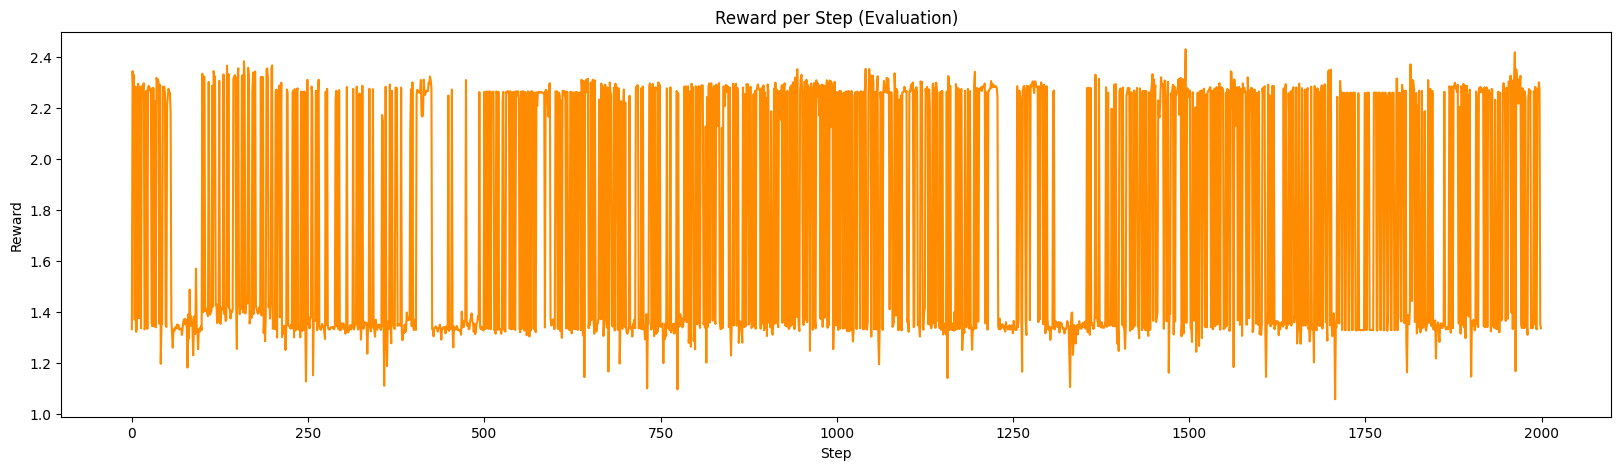

In [63]:
plt.figure(figsize=(20, 5))
plt.plot(all_rewards,color="darkorange")
plt.xlabel('Step')
plt.ylabel('Reward')
plt.title('Reward per Step (Evaluation)')
plt.show()

# Cumulative Reward per Episode

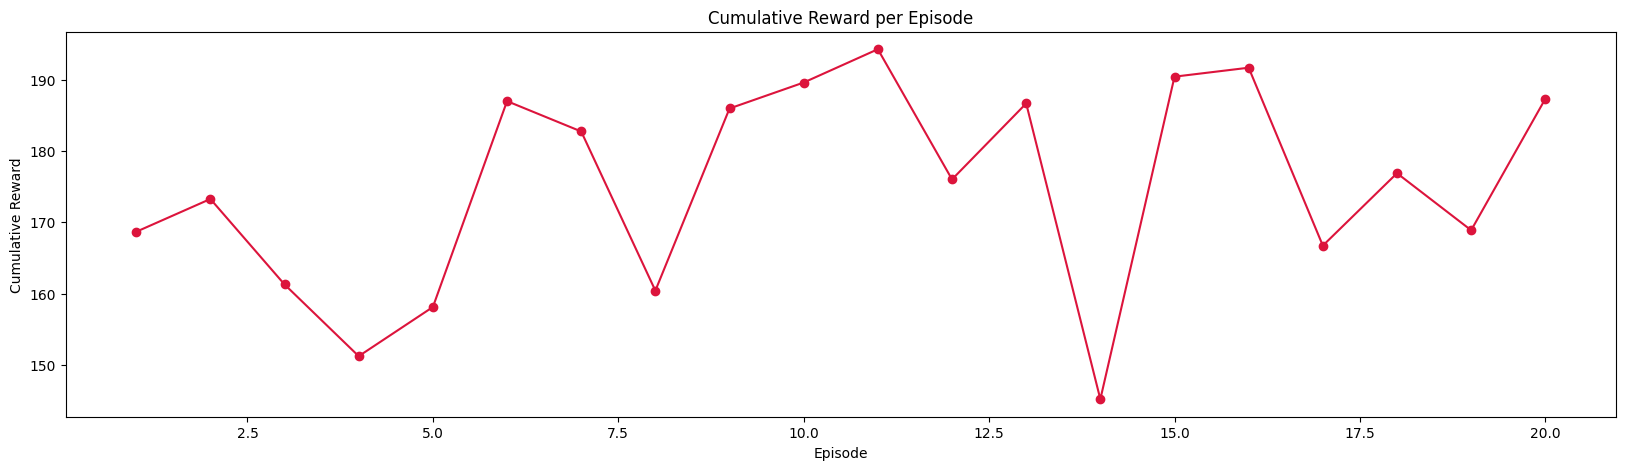

In [64]:
plt.figure(figsize=(20, 5))
plt.plot(range(1, n_eval_episodes + 1), episode_rewards, marker='o',color="crimson")
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward per Episode')
plt.show()

# Action Distribution

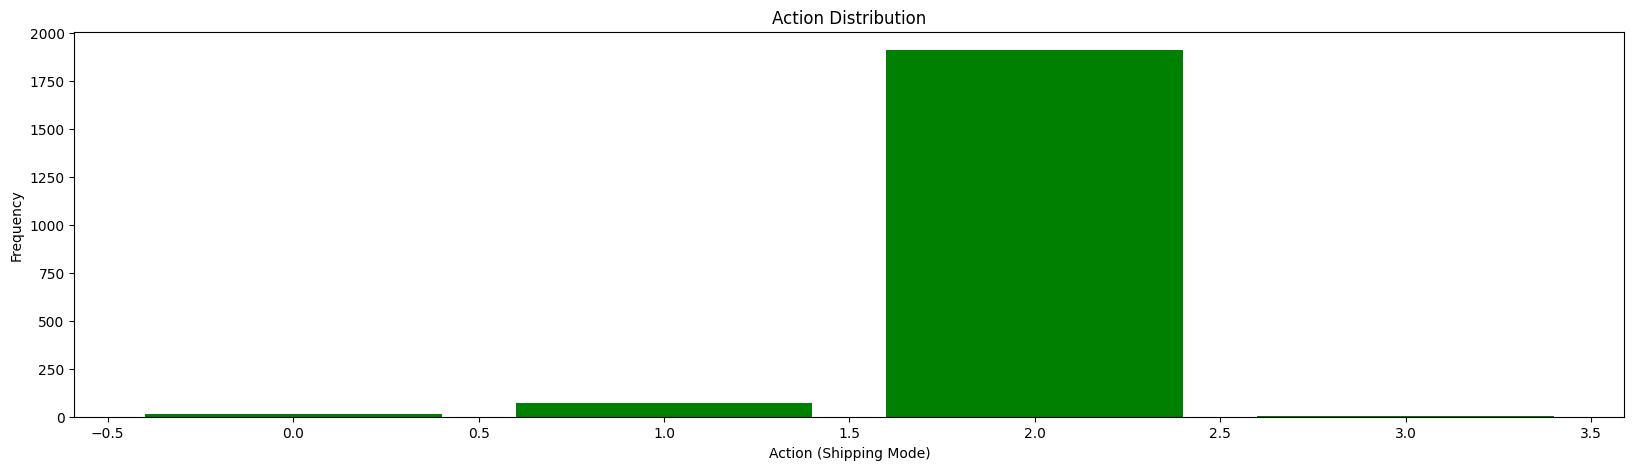

In [65]:
plt.figure(figsize=(20, 5))
plt.bar(action_counts.keys(), action_counts.values(),color="green")
plt.xlabel('Action (Shipping Mode)')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

# Shipping Delay Distribution (Evaluation)

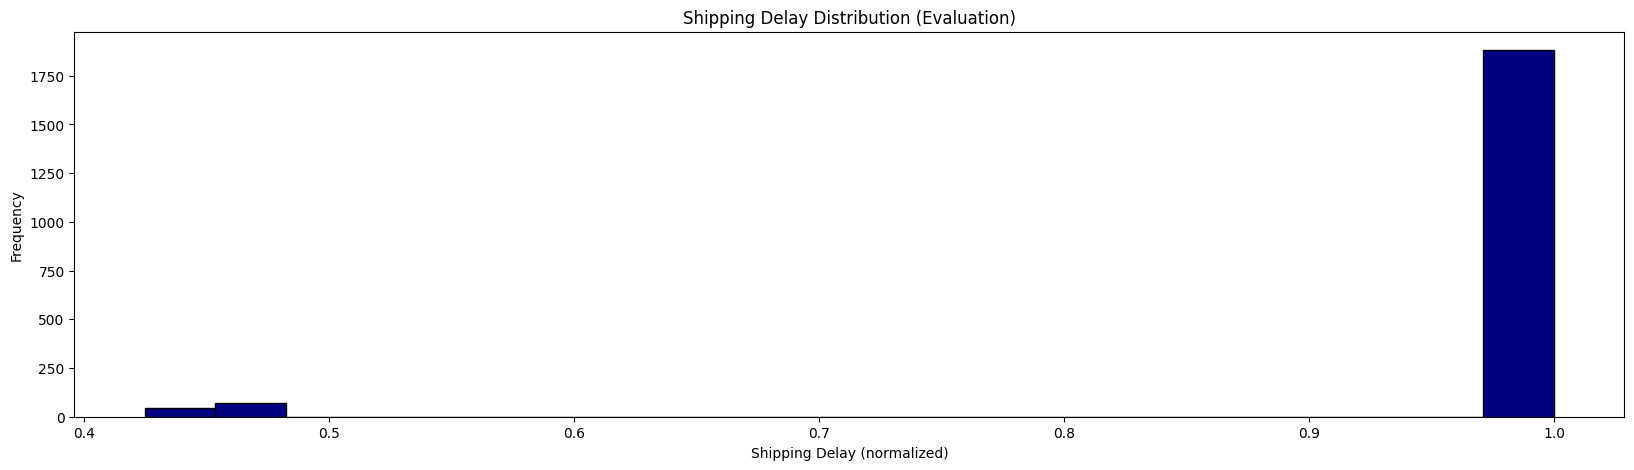

In [66]:
plt.figure(figsize=(20, 5))
plt.hist(shipping_delays, bins=20, edgecolor='black',color="navy")
plt.xlabel('Shipping Delay (normalized)')
plt.ylabel('Frequency')
plt.title('Shipping Delay Distribution (Evaluation)')
plt.show()

# Late Delivery Risk Distribution

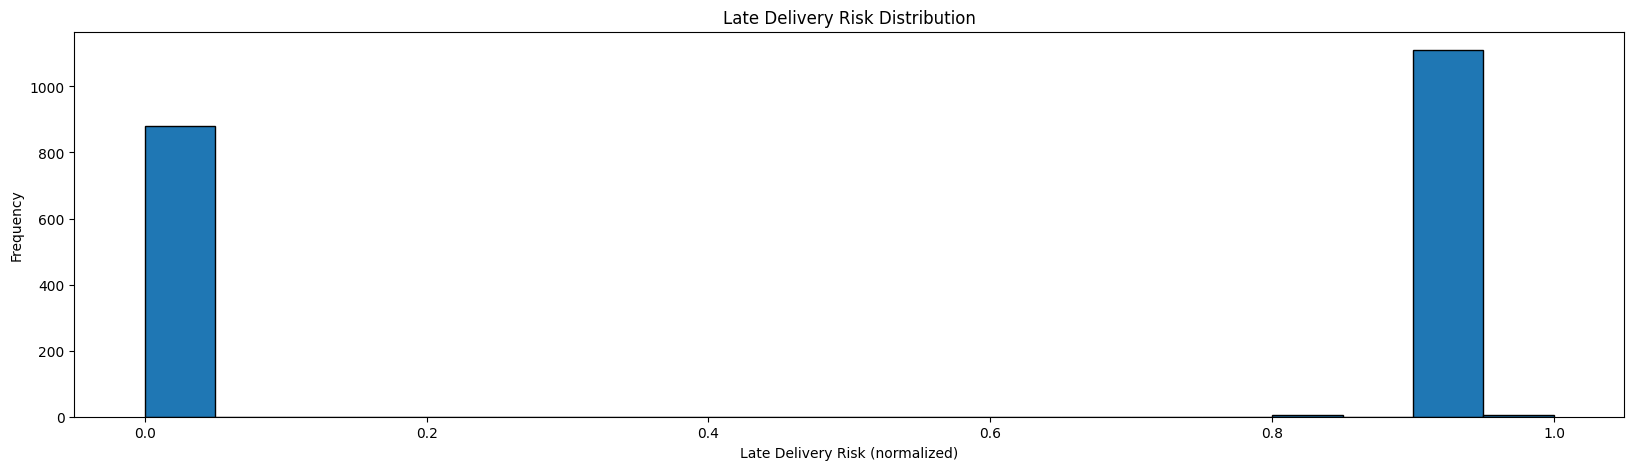

In [67]:
plt.figure(figsize=(20, 5))
plt.hist(late_risks, bins=20, edgecolor='black')
plt.xlabel('Late Delivery Risk (normalized)')
plt.ylabel('Frequency')
plt.title('Late Delivery Risk Distribution')
plt.show()

#  Benefit per Order Distribution

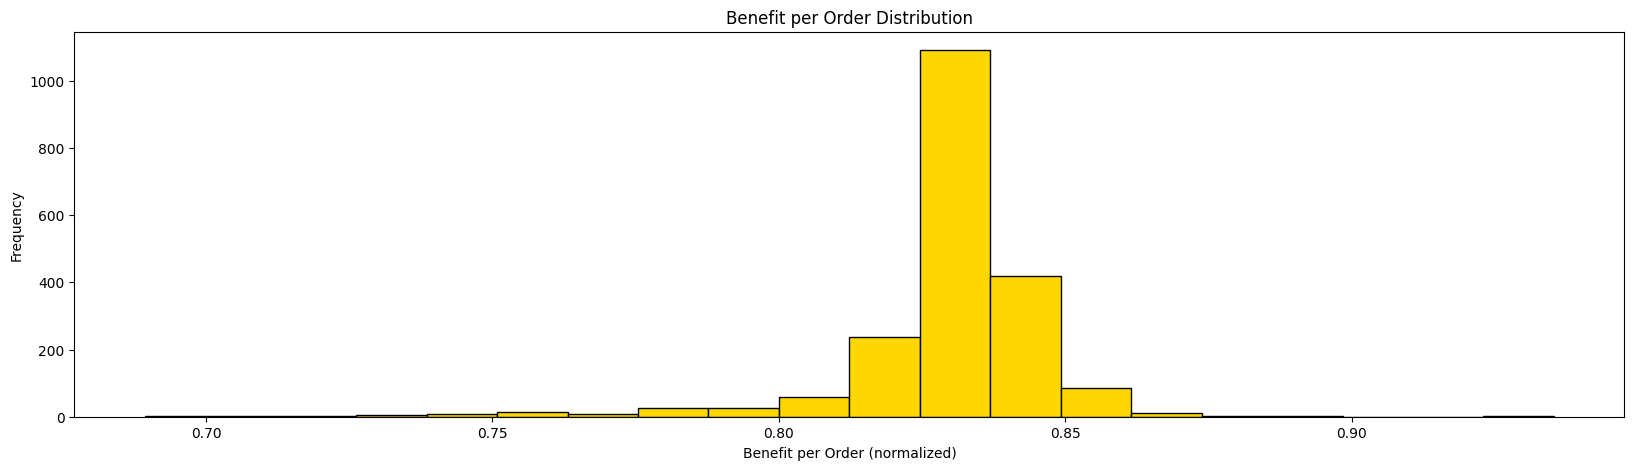

In [68]:
plt.figure(figsize=(20, 5))
plt.hist(benefits, bins=20, edgecolor='black',color="gold")
plt.xlabel('Benefit per Order (normalized)')
plt.ylabel('Frequency')
plt.title('Benefit per Order Distribution')
plt.show()

#  Rolling Average Reward

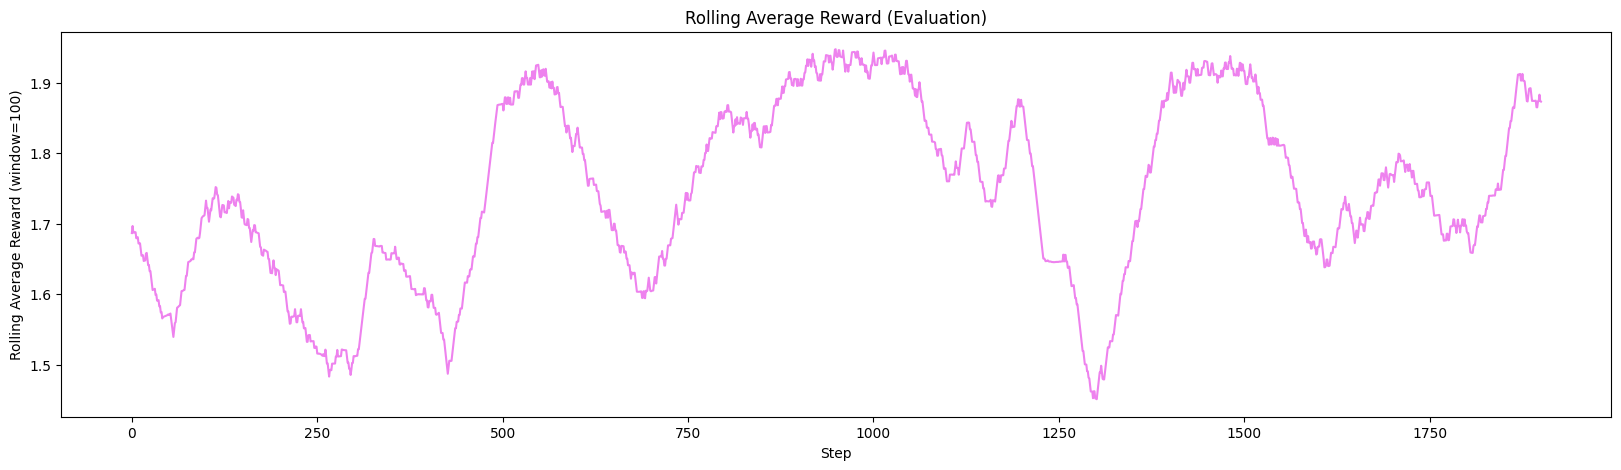

In [69]:
window_size = 100
rolling_avg = np.convolve(all_rewards, np.ones(window_size)/window_size, mode='valid')
plt.figure(figsize=(20, 5))
plt.plot(rolling_avg,color="violet")
plt.xlabel('Step')
plt.ylabel(f'Rolling Average Reward (window={window_size})')
plt.title('Rolling Average Reward (Evaluation)')
plt.show()

In [70]:
import os
save_dir = "/kaggle/working/ppo_supply_chain_model"
os.makedirs(save_dir, exist_ok=True)
model.save(f"{save_dir}/ppo_model")
print("Model saved at:", f"{save_dir}/ppo_model")

Model saved at: /kaggle/working/ppo_supply_chain_model/ppo_model


In [71]:
! pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.13
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
alembic==1.16.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.2
arrow==1.3.0
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.23.0.39.50
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
bayesian-optimization==3.0.0
beartype==0.21.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.0
bokeh==3.7.3
Boruta==0.4.3
boto3==1.39.1
botocore==1.39.1
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb